<br>

<div align=center><font color=maroon size=6><b>Deep Learning with PyTorch: A 60 Minute Blitz </b></font></div>

<br>

<font size=4><b>References:</b></font>
1. Pytorch official tutorials: <a href="https://pytorch.org/tutorials/index.html" style="text-decoration:none;">WELCOME TO PYTORCH TUTORIALS</a>
* `Tutorials >` <a href="https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html" style="text-decoration:none;">Deep Learning with PyTorch: A 60 Minute Blitz</a>
    * `Tutorials >` Deep Learning with PyTorch: A 60 Minute Blitz > <a href="https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py" style="text-decoration:none;">Tensors</a>
    * `Tutorials >` Deep Learning with PyTorch: A 60 Minute Blitz > <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html" style="text-decoration:none;">A Gentle Introduction to torch.autograd</a>

<br>
<br>
<br>

<font color=gray size=3>Tutorials > Deep Learning with PyTorch: A 60 Minute Blitz > </font>

# <font style="font-size:120%;color:maroon;font-weight:bold">Tensors</font> <a href="https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py" style="text-decoration:none;"><font size=2>[link]</font></a>

<br>

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we <font color=maroon>use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.</font>

<font color=maroon>Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other specialized hardware to accelerate computing.</font> If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along in this quick API walkthrough.

<br>

## Tensor Initialization

### Directly from data

<br>

### From a NumPy array

<br>

### From another tensor

<br>

### With random or constant values

<br>
<br>

## Tensor Attributes

<br>
<br>

## Tensor Operations

### Move to GPU

Over 100 tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random sampling, and more are comprehensively described 
<a href="https://pytorch.org/docs/stable/torch.html" style="text-decoration:none;"><font color=maroon size=4>here</font></a>.

Each of them can be run on the GPU (at typically higher speeds than on a CPU). If you’re using Colab, allocate a GPU by going to Edit > Notebook Settings.

<br>

### Standard numpy-like indexing and slicing

<br>

### Joining tensors 

You can use `torch.cat` to concatenate a sequence of tensors along a given dimension. <br>
See also <a href="https://pytorch.org/docs/stable/generated/torch.stack.html" style="text-decoration:none;"><font color=maroon>**torch.stack**</font></a>, another tensor joining op that is subtly different from torch.cat.

<br>

### Multiplying tensors

<br>

<br>

### In-place operations

<font size=3 color=maroon>Operations that have a <b>_</b> suffix are in-place. For example: `x.copy_(y)`, `x.t_()`, will change x.</font>

<div class="alert alert-block alert-info">

<font size=3 color=red><b>NOTE: </b></font>

<font size=3>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.</font>

</div>

<br>
<br>

## Bridge with NumPy

<font size=3 color=maroon>Tensors on the CPU and NumPy arrays <b>can share their underlying memory locations</b>, and changing one will change the other.</font>

<br>

### Tensor to NumPy array

In [24]:
import torch
import numpy as np

In [25]:
t = torch.ones(5)

n = t.numpy()

<br>

<font size=3 color=maroon>A change in the tensor reflects in the NumPy array.</font>

In [26]:
t.add_(1)

print(f"t: {t}")

print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


<br>

In [28]:
n+1

print(f"t: {t}")

print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [29]:
np.add(n, 1, out=n)

print(f"t: {t}")

print(f"n: {n}")

t: tensor([3., 3., 3., 3., 3.])
n: [3. 3. 3. 3. 3.]


<br>

### NumPy array to Tensor

In [34]:
n = np.ones(5)

t = torch.from_numpy(n)

<br>

<font size=3 color=maroon>Changes in the NumPy array reflects in the tensor.</font>

In [35]:
np.add(n, 1, out=n)

print(f"t: {t}")

print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


<br>

In [36]:
t.add_(1)

print(f"t: {t}")

print(f"n: {n}")

t: tensor([3., 3., 3., 3., 3.], dtype=torch.float64)
n: [3. 3. 3. 3. 3.]


<br>
<br>
<br>

<font color=gray size=3>Tutorials > Deep Learning with PyTorch: A 60 Minute Blitz > </font>

# <font style="font-size:120%;color:maroon;font-weight:bold">A Gentle Introduction to torch.autograd</font> <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html" style="text-decoration:none;"><font size=2>[link]</font></a>

<br>

<font size=3 color=maroon><b>torch.autograd</b> is PyTorch’s ***automatic differentiation engine*** that powers neural network training.</font> In this section, you will get a conceptual understanding of how autograd helps a neural network train.

<br>

## Background <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#background" style="text-decoration:none;font-size:70%">[link]</a>

`Neural networks (NNs)` are a collection of ***nested functions*** that are executed on some input data. These functions are defined by <font size=3 color=maroon>parameters (consisting of <b>weights</b> and <b>biases</b>)</font>, which in PyTorch are stored in **tensors**.

<br>
<br>

Training a NN happens in two steps:
* <font size=3 color=maroon><b>Forward Propagation:</b></font> In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.


* <font size=3 color=maroon><b>Backward Propagation:</b></font> In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, <font color=maroon>collecting the derivatives of the error with respect to the parameters of the functions (<i>gradients</i>)</font>, and optimizing the parameters using ***gradient descent***. For a more detailed walkthrough of backprop, check out this <a href="https://www.youtube.com/watch?v=tIeHLnjs5U8" style="text-decoration:none;font-size:120%">video from 3Blue1Brown</a>.

<br>
<br>

## Usage in PyTorch <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#usage-in-pytorch" style="text-decoration:none;font-size:70%">[link]</a>

Let’s take a look at a single training step. For this example, we load a pretrained **resnet18** model from `torchvision`. We create a random data tensor to represent a single image with 3 channels, and height & width of 64, and its corresponding `label` initialized to some random values. Label in pretrained models has shape (1,1000).

<div class="alert alert-block alert-info">

<font size=3 color=black><b>NOTE: </b></font>

This tutorial work only on CPU and will not work on GPU (even if tensor are moved to CUDA).

</div>

In [1]:
import torch, torchvision

model = torchvision.models.resnet18(pretrained=True)

data = torch.rand(1, 3 ,64, 64)
labels = torch.rand(1, 1000)

Next, we run the input data through the model through each of its layers to make a prediction. This is the **forward pass**.

In [2]:
prediction = model(data)    # forward pass

<br>

We use the model’s prediction and the corresponding label to calculate the error (`loss`). 

<font size=3 color=maroon>The next step is to backpropagate this error through the network. 
* Backward propagation is kicked off when we call `.backward()` on the error tensor. 
* Autograd then calculates and stores the gradients for each model parameter in the parameter’s `.grad` attribute.
</font>

In [3]:
loss = (prediction - labels).sum()
loss.backward()                      # backward pass

<br>

Next, we load an optimizer, in this case SGD with a learning rate of 0.01 and <a href="https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d" style="text-decoration:none;"><font color=maroon size=4>momentum</font></a> of 0.9. We register all the parameters of the model in the optimizer.

In [4]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

<br>

<font size=3 color=maroon>Finally, we call `.step()` to initiate gradient descent. The optimizer adjusts each parameter by its gradient stored in `.grad`.</font>

In [5]:
optim.step()      #gradient descent

<br>

At this point, you have everything you need to train your neural network. The below sections detail the workings of autograd - feel free to skip them.

<br>
<br>

## <font color=maroon>Differentiation in Autograd</font> <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#differentiation-in-autograd" style="text-decoration:none;font-size:70%">[link]</a>

Let’s take a look at how **autograd** collects gradients. <br>
We create two tensors `a` and `b` with <font color=maroon size=3><b>requires_grad=True</b>. This signals to autograd that every operation on them should be ***tracked***.</font>

In [6]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

<br>

We create another tensor `Q` from `a` and `b`.

<font size=4>$$Q=3a^3−b^2$$</font>

In [7]:
Q = 3*a**3 - b**2

Let’s assume `a` and `b` to be parameters of an NN, and `Q `to be the error. In NN training, we want gradients of the error w.r.t. parameters, i.e.

<font size=4>$$\frac{∂Q}{∂a}=9a^2$$</font>

<font size=4>$$\frac{∂Q}{∂b}=-2b$$</font>

<font size=3 color=maroon>When we call **`.backward()`** on `Q`, autograd calculates these gradients and stores them in the respective tensors’ **`.grad`** attribute.</font>

<font size=3 color=maroon>We need to explicitly pass a **`gradient`**` argument` in `Q.backward()` because it is a vector. `gradient` is a tensor of the same shape as `Q`, and <b>it represents the gradient of `Q` w.r.t. itself</b>,</font> i.e.


<font color=maroon size=4>$$\frac{dQ}{dQ}=1$$</font>

<font size=3 color=maroon>Equivalently, we can also aggregate `Q` into a scalar and call backward implicitly, like <b>Q.sum().backward()</b>.</font>

In [8]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)


# Alternative syntax
# Q.sum().backward()

<br>

<font size=3 color=maroon>Gradients are now deposited in `a.grad` and `b.grad`</font>

In [9]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


<br>
<br>

###  <font color=maroon>Optional Reading - Vector Calculus using <b>autograd</b></font> <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#optional-reading-vector-calculus-using-autograd" style="text-decoration:none;font-size:70%">[link]</a>

Mathematically, if you have a vector valued function <font size=4>$\vec{y}=f(\vec{x})$</font>, then the gradient of <font size=4>$\vec{y}$</font> with respect to <font size=4>$\vec{x}$</font> is a <font size=4 color=maroon><b>Jacobian matrix $J$</b></font>:

<font size=4>
$$
J = \left(\frac{∂\mathcal{y}}{∂x_1} \cdots \frac{∂\mathcal{y}}{∂x_n} \right)
  = 
\left(
\begin{matrix}
\frac{∂y_1}{∂x_1}  & \cdots & \frac{∂y_1}{∂x_n}      \\
\vdots             & \ddots & \vdots \\
\frac{∂y_m}{∂x_1}  & \cdots & \frac{∂y_m}{∂x_n}      \\
\end{matrix}
\right)
$$
</font>

<font size=3><font color=maroon>Generally speaking, **`torch.autograd`** is an engine for <b>computing *vector-Jacobian product*</b>. That is</font>, given any vector <font size=4>$\vec{v}$</font>, compute the product <font size=4 color=maroon>$J^{T}\cdot \vec{v}$</font></font>

<br>

<font size=3 color=maroon>If <font size=4>$\vec{v}$</font> happens to be the gradient of a scalar function <font size=4>$l=g\left(\vec{y}\right)$</font>:</font>


<font size=4>$$\vec{v}=\left(\frac{∂l}{∂y_1} \cdots \frac{∂l}{∂y_m}\right)^T$$</font>

<font size=3>then by the chain rule, the **vector-Jacobian product** would be the gradient of <font size=4>$l$</font> with respect to <font size=4>$\vec{x}$</font>:</font>

<font size=5 color=maroon>
$$
J^{T} \cdot \vec{v} =
\left(
\begin{matrix}
\frac{∂y_1}{∂x_1}  & \cdots & \frac{∂y_m}{∂x_1}      \\
\vdots             & \ddots & \vdots                 \\
\frac{∂y_1}{∂x_n}  & \cdots & \frac{∂y_m}{∂x_n}      \\
\end{matrix}
\right)
\left(
\begin{matrix}
\frac{∂l}{∂y_1} \\
\vdots          \\
\frac{∂l}{∂y_m} \\
\end{matrix}
\right)
=
\left(
\begin{matrix}
\frac{∂l}{∂x_1} \\
\vdots          \\
\frac{∂l}{∂x_n} \\
\end{matrix}
\right)
$$
</font>

<font size=3>This characteristic of vector-Jacobian product is what we use in the above example; `external_grad` represents <font size=4>$\vec{v}$</font>.</font>

<br>
<br>
<br>

## <font color=maroon><b>Computational Graph</b></font> <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#computational-graph" style="text-decoration:none;font-size:70%">[link]</a>

Conceptually, autograd keeps a record of data (tensors) & all executed operations (along with the resulting new tensors) in a <font size=3 color=blue><b>directed acyclic graph `(`DAG`)`</b></font> consisting of 
<a href="https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function" style="text-decoration:none;font-size:130%;">Function</a> objects.

<font size=3>In this DAG, <font color=blue><b>leaves</b></font> are the `input tensors`, <font color=blue><b>roots</b></font> are the `output tensors`. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.</font>

<font size=3><br>
In a <font size=4 color=maroon>**forward pass**</font>, autograd does two things simultaneously:

* run the `requested operation` to compute a resulting tensor, and
* maintain the operation’s `gradient function` in the DAG.

<br>

The <font size=4 color=maroon>**backward pass**</font> kicks off when `.backward()` is called on the DAG root. autograd then:

* computes the gradients from each `.grad_fn`,
* accumulates them in the respective tensor’s `.grad` attribute, and
* using the chain rule, propagates all the way to the leaf tensors.
</font>

<br>

Below is a visual representation of the DAG in our example. In the graph, the arrows are in the direction of the forward pass. <font color=maroon>The <font size=4 color=blue>**nodes**</font> represent the backward functions of each operation in the forward pass.</font> The **leaf nodes** in blue represent our leaf tensors `a` and `b`.

<img src="../images/DAG example.png" width=300px>

<div class="alert alert-block alert-info">

<font size=3 color=red><b>NOTE: </b></font><br><br>
<font size=3>
    **DAGs are <font color=maroon>dynamic</font> in PyTorch**.  An important thing to note is that the graph is <font color=maroon>recreated from scratch</font>; after each `.backward()` call, autograd starts populating a new graph. <font color=maroon>This is exactly what allows you to use control flow statements in your model; you can change the shape, size and operations at every iteration if needed.</font>
</font>
</div>

<br>

### <font color=red>**Exclusion from the DAG**</font> <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#exclusion-from-the-dag" style="text-decoration:none;font-size:70%">[link]</a>

`torch.autograd` tracks operations on all tensors which have their ***`requires_grad`*** flag set to `True`. For tensors that don’t require gradients, setting this attribute to `False` excludes it from the gradient computation DAG.

The output tensor of an operation will require gradients even if only a single input tensor has `requires_grad=True`.

In [10]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")

b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


<br>

In a NN, parameters that don’t compute gradients are usually called <font size=4 color=blue><b>frozen parameters</b></font>. It is useful to “freeze” part of your model if you know in advance that you won’t need the gradients of those parameters (<font color=maroon>this offers some performance benefits by reducing autograd computations</font>).

Another common usecase where exclusion from the DAG is important is for 
<font color=maroon size=4><a href="https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html" style="text-decoration:none;">**finetuning a pretrained network**</a>. In finetuning, we freeze most of the model and typically only modify the classifier layers to make predictions on new labels.</font> <br>

Let’s walk through a small example to demonstrate this. As before, we load a pretrained resnet18 model, and freeze all the parameters.

In [11]:
from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

Let’s say we want to finetune the model on a new dataset with 10 labels. In resnet, the classifier is the last linear layer `model.fc`. We can simply replace it with a new linear layer (unfrozen by default) that acts as our classifier.

In [12]:
model.fc = nn.Linear(512, 10)

Now all parameters in the model, except the parameters of `model.fc`, are frozen. The only parameters that compute gradients are the weights and bias of `model.fc`.

In [13]:
# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Notice although we register all the parameters in the optimizer, the only parameters that are computing gradients (and hence updated in gradient descent) are the weights and bias of the classifier.

The same exclusionary functionality is available as a context manager in 
<a href="https://pytorch.org/docs/stable/generated/torch.no_grad.html" style="text-decoration:none;"><font color=maroon size=4>torch.no_grad()</font></a>.

<br>
<br>

## Further readings: <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#further-readings" style="text-decoration:none;font-size:70%">[link]</a>

* <a href="https://pytorch.org/docs/stable/notes/autograd.html" style="text-decoration:none;"><font color=maroon size=4>In-place operations & Multithreaded Autograd</font></a> （`Docs > Autograd mechanics`）


* <a href="https://colab.research.google.com/drive/1VpeE6UvEPRz9HmsHh1KS0XxXjYu533EC" style="text-decoration:none;"><font color=maroon size=4>Example implementation of reverse-mode autodiff</font></a> (`../../Simple Grad - Colab`)

<br>
<br>
<br>

<font color=gray size=3>Tutorials > Deep Learning with PyTorch: A 60 Minute Blitz > </font>

# <font style="font-size:120%;color:maroon;font-weight:bold">Neural Networks</font> <a href="https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py" style="text-decoration:none;"><font size=2>[link]</font></a>

<br>

Neural networks can be constructed using the `torch.nn` package.

Now that you had a glimpse of `autograd`, `nn` depends on `autograd` to define models and differentiate them. <font color=maroon size=3>An **`nn.Module`** contains layers, and a method `forward(input)` that returns the `output`.</font>

For example, look at this network that classifies digit images:


<img src="../images/mnist.png" width=700px>
<br>
<div style="color:gray" align=center>convnet</div>

It is a simple feed-forward network. It takes the input, feeds it through several layers one after the other, and then finally gives the output.

<font size=3>
<font color=maroon>A typical training procedure for a neural network is as follows:</font><br>

* Define the neural network that has some learnable parameters (or weights)

    
* Iterate over a dataset of inputs

    
* Process input through the network

    
* Compute the loss (how far is the output from being correct)

    
* Propagate gradients back into the network’s parameters

    
* Update the weights of the network, typically using a simple update rule: `weight = weight - learning_rate * gradient`

</font>


## Define the network <a href="https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#define-the-network" style="text-decoration:none;font-size:70%">[link]</a>

Let’s define this network:

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # 1 input image channel, 
        # 6 output channels, 
        # 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*5*5, 120)    # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        
    def forward(self, x):
        # Maxpooling over a (2,2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        # Flatten all dimensions except the batch dimension
        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [3]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


<br>

<font size=3>You just have to define the `forward` function, and the `backward` function (where gradients are computed) is automatically defined for you using `autograd`. You can use any of the Tensor operations in the `forward` function.</font>


<font size=3>The learnable parameters of a model are returned by `net.parameters()`</font>

In [4]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [5]:
net.parameters()

<generator object Module.parameters at 0x0000026350076D60>

In [6]:
len(net.parameters())

TypeError: object of type 'generator' has no len()

<br>

Let’s try a random 32x32 input. <font color=maroon>**Note:** expected input size of this net (LeNet) is 32x32. To use this net on the MNIST dataset, please resize the images from the dataset to 32x32.</font>

In [7]:
inputs = torch.randn(1, 1, 32, 32)
out = net(inputs)
print(out)

tensor([[-0.1082,  0.0558, -0.1119, -0.1370,  0.0078,  0.1016,  0.0788, -0.0058,
          0.0589, -0.0874]], grad_fn=<AddmmBackward0>)


<br>

<font color=red>下面 In[12]、In[16]、 In[17]的代码如果在这里按顺序执行下去的话，到了 `3.3  Backprop` 这一小节，就会给该小节的代码带来错误！所以后面重启了 kernel，从 `3  Neural Networks` 开始重新执行这一篇的代码时，就跳过了下面这3处代码片段 </font>

Zero the gradient buffers of all parameters and backprops with random gradients:

In [12]:
net.zero_grad()
out.backward(torch.randn(1,10))

<br>

In [16]:
inputs.grad

In [17]:
inputs.requires_grad

False

<br>

<div class="alert alert-block alert-danger">

<font size=3 color=red><b>NOTE: </b></font>
<br>
<br>
<font color=black>**torch.nn** only supports mini-batches. The entire **torch.nn** package only supports inputs that are a mini-batch of samples, and not a single sample.

For example, `nn.Conv2d` will take in a 4D Tensor of `nSamples x nChannels x Height x Width`.

If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.</font>

</div>

<br>
<br>
<br>

Before proceeding further, let’s recap all the classes you’ve seen so far.

<font size=3>

<font color=maroon>**Recap:**</font>


* **`torch.Tensor`** - A ***multi-dimensional array*** with support for autograd operations like `backward()`. Also holds the gradient w.r.t. the tensor.


* **`nn.Module`** - Neural network module. ***Convenient way of encapsulating parameters***, with helpers for moving them to GPU, exporting, loading, etc.


* **`nn.Parameter`** - A kind of Tensor, that ***is automatically registered as a parameter when assigned as an attribute to a*** `Module`.


* **`autograd.Function`** - Implements forward and backward definitions of an autograd operation. Every `Tensor` operation creates at least a single `Function` node that connects to functions that created a `Tensor` and encodes its history.

</font>


<br>

**At this point, we covered:**

* Defining a neural network

* Processing inputs and calling backward



**Still Left:**

* Computing the loss

* Updating the weights of the network

<br>
<br>
<br>

## Loss Function <a href="https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#loss-function" style="text-decoration:none;font-size:70%">[link]</a>

<font size=3>

A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.

There are several different <a href="https://pytorch.org/docs/nn.html#loss-functions" style="text-decoration:none;color:maroon;font-size:120%;">loss functions</a> under the nn package . A simple loss is: nn.MSELoss which computes the mean-squared error between the input and the target.

</font>


For example:

In [17]:
output = net(inputs)

target = torch.randn(10)     # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output

criterion = nn.MSELoss()
loss = criterion(output, target)
loss

tensor(0.6423, grad_fn=<MseLossBackward0>)

<br>

<font size=3 color=maroon>Now, if you follow `loss` in the backward direction, using its **`.grad_fn`** attribute, you will see a graph of computations that looks like this:</font>

<font color=maroon size=3>So, when we call `loss.backward()`, the whole graph is differentiated w.r.t. the neural net parameters, and all Tensors in the graph that have `requires_grad=True` will have their `.grad` Tensor accumulated with the gradient.</font>

For illustration, let us follow a few steps backward:

In [18]:
print(loss.grad_fn)    # MSELoss
print(loss.grad_fn.next_functions[0][0])   # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

<br>
<br>
<br>

## Backprop <a href="https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop" style="text-decoration:none;font-size:70%">[link]</a>

<font color=maroon size=3>To backpropagate the error all we have to do is to `loss.backward()`. You need to clear the existing gradients though, else gradients will be accumulated to existing gradients.</font>

Now we shall call `loss.backward()`, and have a look at conv1’s bias gradients before and after the backward.

In [19]:
net.zero_grad()    # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward:')
print(net.conv1.bias.grad)
print()

loss.backward()

print('conv1.bias.grad after backward:')
print(net.conv1.bias.grad)

conv1.bias.grad before backward:
tensor([0., 0., 0., 0., 0., 0.])

conv1.bias.grad after backward:
tensor([ 0.0035,  0.0101,  0.0070, -0.0042,  0.0110, -0.0035])


<br>

Now, we have seen how to use loss functions.

**Read Later:**

<div style="padding:18px">The <b>neural network</b> package contains various <b>modules</b> and <b>loss functions</b> that form the building blocks of deep neural networks. A full list with documentation is <a href="https://pytorch.org/docs/nn" style="text-decoration:none;color:maroon;font-size:120%;">here</a>.</div>


**The only thing left to learn is:**

* Updating the weights of the network

<br>
<br>
<br>

## Update the weights <a href="https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#update-the-weights" style="text-decoration:none;font-size:70%">[link]</a>

<font size=3>The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):
    
    
<font color=maroon>$$weight = weight - learning\_rate * gradient$$</font>

    
We can implement this using simple Python code:
</font>



<font style="font-size:120%;LINE-HEIGHT: 30px">

```python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
```

</font>

<font size=3>However, as you use neural networks, you want to use various different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc. To enable this, we built a small package: `torch.optim` that implements all these methods. 
    
Using it is very simple:</font>


In [ ]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()        # Does the update

<div class="alert alert-block alert-info">

<font size=3 color=red><b>NOTE: </b></font>
<br>
<br>
<font color=black>Observe how gradient buffers had to be manually set to zero using `optimizer.zero_grad()`. This is because gradients are accumulated as explained in the <a href="https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop" style="text-decoration:none;color:maroon;font-size:120%;">Backprop</a> section.</font>

</div>

<br>
<br>
<br>

<font color=gray size=3>Tutorials > Deep Learning with PyTorch: A 60 Minute Blitz > </font>

# <font style="font-size:120%;color:maroon;font-weight:bold">Training a Classifier</font> <a href="https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py" style="text-decoration:none;"><font size=2>[link]</font></a>

<br>

This is it. You have seen how to define neural networks, compute loss and make updates to the weights of the network.

Now you might be thinking,

## What about data? <a href="https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#what-about-data" style="text-decoration:none;font-size:70%">[link]</a>

<font size=3 color=maroon>
Generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a `torch.*Tensor`.
<br><br>

* For **images**, packages such as **`Pillow`**, **`OpenCV`** are useful

    
* For **audio**, packages such as **`scipy`** and **`librosa`**

    
* For **text**, either **`raw Python`** or **`Cython based`** loading, or **`NLTK`** and **`SpaCy`** are useful

    
Specifically for vision, we have created a package called ***torchvision***, that has data loaders for common datasets such as `ImageNet, CIFAR10, MNIST, etc`. and data transformers for images, viz., ***torchvision.datasets*** and ***torch.utils.data.DataLoader***.

</font>

<font size=3>This provides a huge convenience and avoids writing boilerplate code.</font>

<br>

For this tutorial, we will use the `CIFAR10` dataset. It has the classes: `‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’`. 

The images in CIFAR-10 are of size **3x32x32**, i.e. 3-channel color images of 32x32 pixels in size.
<br><br>

<img src="../images/cifar10.png" width=400px>
<br>
<div style="color:gray" align=center>cifar10</div>

<br>
<br>

## Training an image classifier <a href="https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-an-image-classifier" style="text-decoration:none;font-size:70%">[link]</a>

<font size=3>

We will do the following steps in order:

* Load and normalize the CIFAR10 training and test datasets using torchvision
* Define a Convolutional Neural Network
* Define a loss function
* Train the network on the training data
* Test the network on the test data
</font>


### Load and normalize CIFAR10 <a href="https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#load-and-normalize-cifar10" style="text-decoration:none;font-size:70%">[link]</a>

Using `torchvision`, it’s extremely easy to load CIFAR10.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

<br>

<font size=4 color=maroon>The output of torchvision datasets are **PILImage** images of range `[0, 1]`. We transform them to Tensors of normalized range `[-1, 1]`.</font>

<div class="alert alert-block alert-info">

<font size=3 color=red><b>NOTE: </b></font>
<br>
<br>
<font color=black size=3>If running on Windows and you get a **BrokenPipeError**, try setting the **num_worker** of **`torch.utils.data.DataLoader()`** to **0**.</font>

</div>

<br>

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), 
                                                     (0.5, 0.5, 0.5))
                               ])

batch_size = 4

# train dataloader
trainset = torchvision.datasets.CIFAR10(root="./data",
                                        train=True,
                                        # download=True,    # 已经下载过
                                        download=False,
                                        transform = transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=2)

# test dataloader
testset = torchvision.datasets.CIFAR10(root="./data",
                                       train=False,
                                       # download=True,    # 已经下载过
                                       download=False,
                                       transform=transform)

testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=batch_size,
                                         shuffle=False, 
                                         num_workers=2)


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

<br>

Let us show some of the training images, for fun.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# functions to show an image
def imshow(img):
    img = img /2 + 0.5    # unnormalize
    img_np = img.numpy()
    
    plt.imshow(np.transpose(img_np, (1,2,0)))
    plt.show()

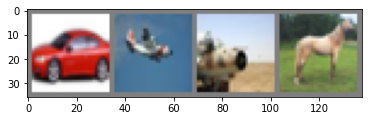

car   plane plane horse


In [6]:
# get some random training images
data_iter = iter(trainloader)
images, labels = data_iter.next()


# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

<br>

### Define a Convolutional Neural Network <a href="https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-convolutional-neural-network" style="text-decoration:none;font-size:70%">[link]</a>

Copy the neural network from the Neural Networks section before and modify it to take 3-channel images (instead of 1-channel images as it was defined).

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # 3 input image channel, 
        # 6 output channels, 
        # 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16*5*5, 120)    # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        
    def forward(self, x):
        # Maxpooling over a (2,2) window
        # x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        
        # If the size is a square, you can specify with a single number
        # x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # Flatten all dimensions except the batch dimension
        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [11]:
net = Net()

<br>

### Define a Loss function and optimizer <a href="https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer" style="text-decoration:none;font-size:70%">[link]</a>

Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

<br>

### Train the network <a href="https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#train-the-network" style="text-decoration:none;font-size:70%">[link]</a>

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [13]:
for epoch in range(10):    # loop over the dataset multiple times
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.222
[1,  4000] loss: 1.822
[1,  6000] loss: 1.678
[1,  8000] loss: 1.575
[1, 10000] loss: 1.521
[1, 12000] loss: 1.465
[2,  2000] loss: 1.413
[2,  4000] loss: 1.377
[2,  6000] loss: 1.369
[2,  8000] loss: 1.342
[2, 10000] loss: 1.295
[2, 12000] loss: 1.293
[3,  2000] loss: 1.221
[3,  4000] loss: 1.213
[3,  6000] loss: 1.219
[3,  8000] loss: 1.194
[3, 10000] loss: 1.169
[3, 12000] loss: 1.194
[4,  2000] loss: 1.114
[4,  4000] loss: 1.101
[4,  6000] loss: 1.116
[4,  8000] loss: 1.111
[4, 10000] loss: 1.108
[4, 12000] loss: 1.114
[5,  2000] loss: 1.038
[5,  4000] loss: 1.026
[5,  6000] loss: 1.033
[5,  8000] loss: 1.053
[5, 10000] loss: 1.036
[5, 12000] loss: 1.043
[6,  2000] loss: 0.953
[6,  4000] loss: 0.976
[6,  6000] loss: 0.992
[6,  8000] loss: 0.983
[6, 10000] loss: 0.998
[6, 12000] loss: 0.994
[7,  2000] loss: 0.903
[7,  4000] loss: 0.928
[7,  6000] loss: 0.921
[7,  8000] loss: 0.942
[7, 10000] loss: 0.956
[7, 12000] loss: 0.967
[8,  2000] loss: 0.853
[8,  4000] 

<br>

Let’s quickly save our trained model:

In [14]:
PATH = "../model_weights/cifar_net.pth"
torch.save(net.state_dict(), PATH)

See <a href="https://pytorch.org/docs/stable/notes/serialization.html" style="text-decoration:none;color:maroon;font-size:120%;">here</a> for more details on saving PyTorch models.

<br>

### Test the network on the test data <a href="https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#test-the-network-on-the-test-data" style="text-decoration:none;font-size:70%">[link]</a>

We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

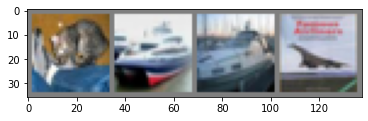

GroundTruth:  cat   ship  ship  plane


In [15]:
data_iter = iter(testloader)
images, labels = data_iter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

<br>

Next, let’s load back in our saved model (note: saving and re-loading the model wasn’t necessary here, we only did it to illustrate how to do so):

In [16]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

<br>

Okay, now let us see what the neural network thinks these examples above are:

In [17]:
outputs = net(images)

The outputs are energies for the 10 classes. The higher the energy for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest energy:

In [18]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  truck ship  car   plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.

In [19]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        # calculate outputs by running images through the network
        outputs = net(images)
        
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size()[0]
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 62 %


<br>

That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [20]:
# prepare to count predictions for each class
correct_pred = {classname:0 for classname in classes}
total_pred = {classname:0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predicted):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 60.4 %
Accuracy for class: car   is 71.0 %
Accuracy for class: bird  is 50.9 %
Accuracy for class: cat   is 40.6 %
Accuracy for class: deer  is 54.8 %
Accuracy for class: dog   is 51.7 %
Accuracy for class: frog  is 71.7 %
Accuracy for class: horse is 67.1 %
Accuracy for class: ship  is 80.1 %
Accuracy for class: truck is 76.8 %


<br>

Okay, so what next?

How do we run these neural networks on the GPU?

<br>

### Training on GPU <a href="https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-on-gpu" style="text-decoration:none;font-size:70%">[link]</a>

Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU.

Let’s first define our device as the first visible cuda device if we have CUDA available:

In [21]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


<br>

The rest of this section assumes that `device` is a CUDA device.

Then these methods will recursively go over all modules and convert their parameters and buffers to CUDA tensors:

In [ ]:
net.to(device)

<font size=3 color=maroon>Remember that you will have to send the inputs and targets at every step to the GPU too:</font>


In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)

<br>

Why don’t I notice MASSIVE speedup compared to CPU? Because your network is really small.

**Exercise**: Try increasing the width of your network (argument 2 of the first nn.Conv2d, and argument 1 of the second nn.Conv2d – they need to be the same number), see what kind of speedup you get.

**Goals achieved**:

* Understanding PyTorch’s Tensor library and neural networks at a high level.
* Train a small neural network to classify images

<br>

### Training on multiple GPUs <a href="https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-on-multiple-gpus" style="text-decoration:none;font-size:70%">[link]</a>

<font size=3>If you want to see even more MASSIVE speedup using all of your GPUs, please check out <a href="https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html" style="text-decoration:none;color:maroon;font-size:120%;">Optional: Data Parallelism</a>.</font>


<br>

### Where do I go next? <a href="https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#where-do-i-go-next" style="text-decoration:none;font-size:70%">[link]</a>

* <a href="https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html" style="text-decoration:none;color:maroon;font-size:120%;">Train neural nets to play video games</a>


* <a href="https://github.com/pytorch/examples/tree/master/imagenet" style="text-decoration:none;color:maroon;font-size:120%;">Train a state-of-the-art ResNet network on imagenet</a>


* <a href="https://github.com/pytorch/examples/tree/master/dcgan" style="text-decoration:none;color:maroon;font-size:120%;">Train a face generator using Generative Adversarial Networks</a>


* <a href="https://github.com/pytorch/examples/tree/master/word_language_model" style="text-decoration:none;color:maroon;font-size:120%;">Train a word-level language model using Recurrent LSTM networks</a>


* <a href="https://github.com/pytorch/examples" style="text-decoration:none;color:maroon;font-size:120%;">More examples</a>


* <a href="https://github.com/pytorch/tutorials" style="text-decoration:none;color:maroon;font-size:120%;">More tutorials</a>


* <a href="https://discuss.pytorch.org/" style="text-decoration:none;color:maroon;font-size:120%;">Discuss PyTorch on the Forums</a>


* <a href="https://pytorch.slack.com/messages/beginner/" style="text-decoration:none;color:maroon;font-size:120%;">Chat with other users on Slack</a>

<br>
<br>
<br>

<font size=3></font>
<font color=maroon>****</font>

<img src="./images/.png" width=800px>
<br>
<div style="color:gray" align=center></div>

<a href="" style="text-decoration:none;font-size:70%">[link]</a>
<a href="" style="text-decoration:none;font-size:120%"></a>

<a href="" style="text-decoration:none;color:maroon;font-size:120%;"></a>

&emsp;&emsp;&emsp;&ensp;
<a href="" style="text-decoration:none;color:maroon;font-size:140%;font-weight:bold;"></a>



<font style="font-size:120%;LINE-HEIGHT: 30px">

```python

```

</font>

<font style="font-size:120%;LINE-HEIGHT: 30px">
<font color=red><b>代码学习：</b></font><br>

```python

```

</font>

<br>
<br>
<br>